<a href="https://colab.research.google.com/github/appersaravanan/Semeter-2-Assignment-1/blob/master/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split,KFold
import matplotlib.pyplot as plt
from math import ceil, floor
import random
from random import randrange

In [2]:
def show_imgs(images):
    fig, axs = plt.subplots(4, 4)
    cnt = 0
    for i in range(4):
        for j in range(4):
            axs[i,j].imshow(images[cnt])
            axs[i,j].axis('off')
            cnt += 1
    
    
    plt.show()

#Load cifar10 dataset

In [3]:

(x_train,y_train),(x_test,y_test) =cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)



170500096/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


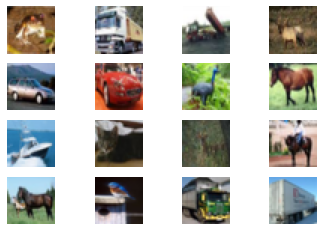

In [4]:
show_imgs(x_train)

# Normalization


In [5]:
batch_size=128
print(x_train.min() , x_train.max())
x_train = x_train- x_train.min() / x_train.max()- x_train.min()
x_train =x_train/255
print(x_train.min() , x_train.max())



0 255
0.0 1.0


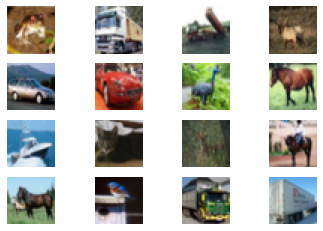

In [6]:
show_imgs(x_train)

##Hold-out defination

In [7]:
def hold_out(ds,labels, train_ds_size,vald_ds_size):
  if ds is None:
      raise ValueError("ds can't be empty")
  # print(len(ds))
 
  if isinstance(train_ds_size, float) and isinstance(vald_ds_size, float) and (train_ds_size+vald_ds_size>1.0) :
    raise ValueError("Split size is greater the dataset size")
  train_count=ceil(train_ds_size* len(ds))

  valid_count=ceil(vald_ds_size* len(ds))
  # print(train_count)
  # print(valid_count)
  # print(ds[:train_count].shape)
  # print(ds[train_count:(train_count+valid_count)].shape)
  return ds[:train_count],ds[train_count:(train_count+valid_count)],labels[:train_count],labels[train_count:(train_count+valid_count)]

In [8]:
def k_fold(ds,labels_train,fold_count):
    ds_fold=ceil(len(ds)/fold_count)
   
    fold_list=list();
    label_fold_list=list()
    for i in range(fold_count):
      
      fold_entires=list();
      fold_list.append(fold_entires)
      label_fold=list();
      label_fold_list.append(label_fold)
      #rand_indices=random.sample(range(0, len(ds)), ds_fold)
      #  print(rand_indices)
      # print(len(fold_list))
      while len(fold_entires) < ds_fold:     
        index = randrange(len(ds))
        label_fold.append(labels_train.pop(index))
        fold_entires.append(ds.pop(index))
      
      # for k in range(len(rand_indices)): 
      #   ds.pop(k-1)
    return fold_list,label_fold_list;
image_list,label_list=k_fold(list(x_train),list(y_train),50)
# print(image_list)
# print(label_list)


In [9]:
validation_ds_fold_list=list()
validation_label_fold_list=list()

def create_validation_from_k_fold(validation_count_from_each_fold=3):
   for i in image_list:
   
     validation_count_from_each_fold_index=0    
    #  print(i)
     while validation_count_from_each_fold_index < validation_count_from_each_fold:
       index = randrange(len(i))
       validation_ds_fold_list.append(i.pop(index))
      #  validation_label_fold_list.append(label_list[i].pop(index))
       validation_count_from_each_fold_index+=1
create_validation_from_k_fold(30);


In [10]:
print(len(validation_ds_fold_list))
print(len(image_list[0]))


1500
970


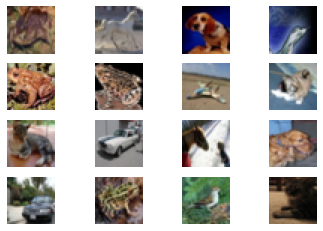

In [11]:
show_imgs(image_list[0])

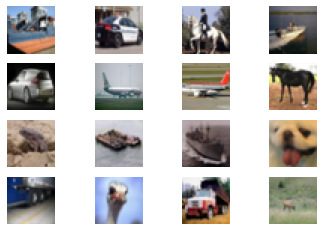

In [12]:
show_imgs(validation_ds_fold_list)

In [13]:
x_train_split, x_vald_split,y_train_split,y_vald_split= hold_out(x_train,y_train,0.7,0.3)
x_train_split
print(x_train_split.shape)
print(y_train_split.shape)
print(x_vald_split.shape)
print(y_vald_split.shape)


(35000, 32, 32, 3)
(35000, 1)
(15000, 32, 32, 3)
(15000, 1)


In [14]:
batch_size=128
print(len(x_train))
print(len(x_train)/batch_size)
print(len(x_train)%batch_size)
def get_batch_data(batch_size=64):
   if len(x_train)<batch_size:
     raise ValueError("Batch size should be smaller than x_train size")
   batch_count=int(len(x_train)/batch_size)
   batch_rest=int(len(x_train)%batch_size)
   startindex=0;
   for i in range(batch_count):
      batch_end=startindex+batch_size
      x_batch= x_train[startindex:batch_end]
      y_batch=y_train[startindex:batch_end]
      yield x_batch,y_batch
      startindex=batch_end
   print(startindex);  
   print(batch_rest)
   
gen=get_batch_data()   ;





50000
390.625
80


(64, 32, 32, 3)
64


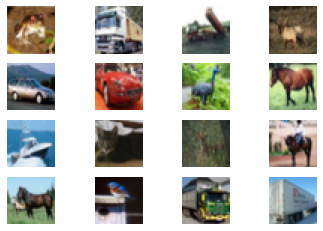

In [15]:
x_batch_2,y_batch_2=next(gen)
print(x_batch_2.shape)
print(len(y_batch_2))
show_imgs(x_batch_2)

In [16]:
while True:
  try:
        x_batch_2,y_batch_2=next(gen)
       
  except StopIteration:
     break
  print(len(x_batch_2))
  print(len(y_batch_2))

64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
6

In [17]:
import pandas as pd 
def add(row): 
    print("element " + str(row.A))
    return row['A'], row['B'], row['C']
def add1(row): 
    print("element " + str(row['0']))
    return row['0'], row['1'], row['2']

data = { 
            'A':[1, 2, 3],  
            'B':[4, 5, 6],  
            'C':[7, 8, 9] } 

df = pd.DataFrame(data) 
#print("Original DataFrame:\n", df) 
      
df['add'] = df.apply(lambda row : add(row), axis = 1) 
print(df['add'])     
# df['add1'] = df.apply(lambda row : add1(row), axis = 0) 
# print(df['add1'])

element 1
element 2
element 3
0    (1, 4, 7)
1    (2, 5, 8)
2    (3, 6, 9)
Name: add, dtype: object


Method to display images that are generatored by generator during the traning at certain epochs

Complie the only Discriminator and the GAN. We don't need a compliation config 
for generator because it is covered as part of GAN